In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

In [2]:
dataset = tf.keras.utils.image_dataset_from_directory(
    directory='./raw-img',
    labels='inferred',  # ou 'none' se não quiser rótulos
    label_mode='int',   # ou 'categorical', 'binary' ou None
    image_size=(224, 224),  # redimensiona as imagens
    batch_size=32,  # define o tamanho do lote
    shuffle=True
)


Found 3363 files belonging to 5 classes.


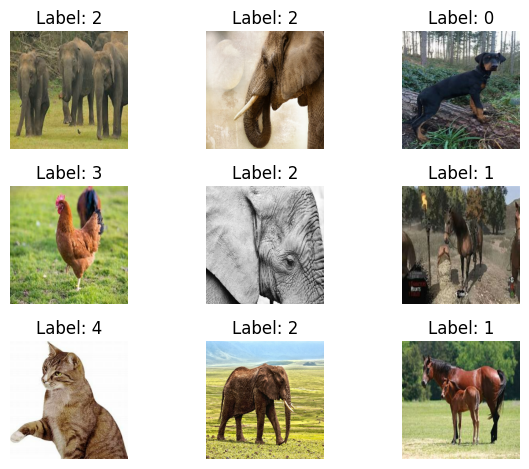

In [3]:
import matplotlib.pyplot as plt

for batch, labels in dataset.take(1):
    for i in range(9):  # mostra as 9 primeiras imagens do primeiro batch
        plt.subplot(3, 3, i + 1)
        plt.title(f"Label: {labels[i].numpy()}")
        plt.imshow(batch[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.tight_layout()
    plt.show()


In [4]:
base_model = ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)  # Extraindo a penúltima camada

In [ ]:
import numpy as np

embeddings_list = []
labels_list = []

num_batches = tf.data.experimental.cardinality(dataset).numpy()

i = 1

for batch, labels in dataset:
    print("batch", i, "/", num_batches)
    i += 1
    
    # 1. Pré-processamento vetorizado (no batch todo)
    # print(batch, labels)
    batch_pp = preprocess_input(batch)  # shape: (batch_size, 256, 256, 3)

    # 2. Geração dos embeddings para o batch
    batch_embeddings = model.predict(batch_pp, verbose=0)

    # 3. Armazenar
    embeddings_list.append(batch_embeddings)
    labels_list.append(labels.numpy())  # converte os labels para numpy

# Concatenar tudo em um único array
# Embeddings: (num_amostras, embedding_dim)


batch 0 / 106
batch 1 / 106
batch 2 / 106
batch 3 / 106
batch 4 / 106
batch 5 / 106
batch 6 / 106
batch 7 / 106
batch 8 / 106
batch 9 / 106
batch 10 / 106
batch 11 / 106
batch 12 / 106
batch 13 / 106
batch 14 / 106
batch 15 / 106
batch 16 / 106
batch 17 / 106
batch 18 / 106
batch 19 / 106
batch 20 / 106
batch 21 / 106
batch 22 / 106
batch 23 / 106
batch 24 / 106
batch 25 / 106
batch 26 / 106
batch 27 / 106
batch 28 / 106
batch 29 / 106
batch 30 / 106
batch 31 / 106
batch 32 / 106
batch 33 / 106
batch 34 / 106
batch 35 / 106
batch 36 / 106
batch 37 / 106
batch 38 / 106
batch 39 / 106
batch 40 / 106
batch 41 / 106
batch 42 / 106
batch 43 / 106
batch 44 / 106
batch 45 / 106
batch 46 / 106
batch 47 / 106
batch 48 / 106
batch 49 / 106
batch 50 / 106
batch 51 / 106
batch 52 / 106
batch 53 / 106
batch 54 / 106
batch 55 / 106
batch 56 / 106
batch 57 / 106
batch 58 / 106
batch 59 / 106
batch 60 / 106
batch 61 / 106
batch 62 / 106
batch 63 / 106
batch 64 / 106
batch 65 / 106
batch 66 / 106
batch

NameError: name 'num_amostras' is not defined

In [ ]:

embeddings_array = np.concatenate(embeddings_list, axis=0)

# Labels: (num_amostras,) ou (num_amostras, n_classes)
labels_array = np.concatenate(labels_list, axis=0)



In [15]:
embeddings_array

array([[0.03337727, 0.39166504, 0.5638104 , ..., 0.13131562, 0.5782248 ,
        0.19108461],
       [0.04729085, 0.2708471 , 0.30175063, ..., 0.02304344, 1.2832899 ,
        0.07798839],
       [0.04248081, 3.5602293 , 0.12115037, ..., 0.51239467, 0.10036461,
        1.5020529 ],
       ...,
       [0.32137412, 3.2864227 , 0.        , ..., 1.4056066 , 0.1577038 ,
        1.5247781 ],
       [0.5173762 , 1.1587002 , 0.12120924, ..., 2.937112  , 1.266108  ,
        0.1205842 ],
       [0.10131938, 1.2605516 , 0.05751693, ..., 0.06173153, 0.07978725,
        0.27848896]], dtype=float32)